<a href="https://colab.research.google.com/github/Prajyoti20/DeepLerning/blob/main/Sentiment_Analysis_Restaurant_Review_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Sentiment Analysis On Restaurant Review**

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### step-1 Read the dataset

In [2]:
import pandas as pd

In [3]:
url="https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/Restaurant_Reviews.tsv"
df=pd.read_csv(url,sep='\t')
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
s="WELCOME to my world....."
s.lower()

'welcome to my world.....'

### provide proper pattern [^a-z]

In [5]:
import re
re.sub('[^a-zA-z]',' ',s)

'WELCOME to my world     '

In [8]:
### provide proper pattern [^a-z]

### Create a function to preprocess text

In [16]:
def preprocess_text(s):
  s=s.lower()
  s=re.sub('[^a-z]'," ",s)
  return s

In [17]:
a = "Wow... , The expericence was very good"
preprocess_text(a)

'wow      the expericence was very good'

### **Apply preprocessing on dataframe**


In [18]:
df['Review_pre']=df['Review'].apply(preprocess_text)

In [19]:
df['Review_pre']

0                               wow    loved this place 
1                                     crust is not good 
2              not tasty and the texture was just nasty 
3      stopped by during the late may bank holiday of...
4      the selection on the menu was great and so wer...
                             ...                        
995    i think food should have flavor and texture an...
996                             appetite instantly gone 
997    overall i was not impressed and would not go b...
998    the whole experience was underwhelming  and i ...
999    then  as if i hadn t wasted enough of my life ...
Name: Review_pre, Length: 1000, dtype: object

In [20]:
df

,Review,Liked,Review_pre
0,Wow... Loved this place.,1,wow loved this place
1,Crust is not good.,0,crust is not good
2,Not tasty and the texture was just nasty.,0,not tasty and the texture was just nasty
3,Stopped by during the late May bank holiday of...,1,stopped by during the late may bank holiday of...
4,The selection on the menu was great and so wer...,1,the selection on the menu was great and so wer...
...,...,...,...
995,I think food should have flavor and texture an...,0,i think food should have flavor and texture an...
996,Appetite instantly gone.,0,appetite instantly gone
997,Overall I was not impressed and would not go b...,0,overall i was not impressed and would not go b...
998,"The whole experience was underwhelming, and I ...",0,the whole experience was underwhelming and i ...


### **Apply TFIDF Vectorizer**


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
X_pre=tfidf.fit_transform(df['Review_pre']).toarray()

In [31]:
X_pre

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [32]:
X_pre.shape

(1000, 2016)

In [34]:
y= df['Liked']


In [35]:
y

0      1
1      0
2      0
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Liked, Length: 1000, dtype: int64

### Apply Train test split


In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_pre,y,test_size=0.2,random_state=0)

In [39]:
x_train.shape

(800, 2016)

In [40]:
x_test.shape

(200, 2016)

In [43]:
y_train.shape

(800,)

In [44]:
y_test.shape

(200,)

In [45]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [46]:
x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [47]:
y_train

687    1
500    1
332    1
979    0
817    1
      ..
835    0
192    0
629    1
559    1
684    1
Name: Liked, Length: 800, dtype: int64

In [48]:
y_test

993    0
859    0
298    0
553    0
672    0
      ..
679    0
722    1
215    1
653    0
150    1
Name: Liked, Length: 200, dtype: int64

In [50]:
from keras.models import Sequential
from keras.layers import Input,Dense,Dropout
from keras.callbacks import EarlyStopping

In [52]:
model = Sequential()

# Input Layer
model.add(Input(shape=(x_train.shape[1],)))

# Hidden Layer 1
model.add(Dense(256, activation='relu'))
# Dropout Layer 1
model.add(Dropout(0.6))

# Hidden Layer 2
model.add(Dense(128, activation='relu'))
# Dropout layer 2
model.add(Dropout(0.6))

# Output Layer
model.add(Dense(1, activation='sigmoid'))

In [53]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               516352    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 549377 (2.10 MB)
Trainable params: 549377 (2.10 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [55]:
es=EarlyStopping(patience=10)

In [57]:
hist = model.fit(x_train, y_train,
                 validation_split=0.2,
                 batch_size=16,
                 epochs=100,
                 callbacks=[es])


Epoch 1/100
40/40 [==============================] - 5s 12ms/step - loss: 0.6907 - accuracy: 0.5344 - val_loss: 0.6869 - val_accuracy: 0.6313
Epoch 2/100
40/40 [==============================] - 0s 7ms/step - loss: 0.6655 - accuracy: 0.6797 - val_loss: 0.6596 - val_accuracy: 0.7625
Epoch 3/100
40/40 [==============================] - 0s 6ms/step - loss: 0.5890 - accuracy: 0.7937 - val_loss: 0.5595 - val_accuracy: 0.8313
Epoch 4/100
40/40 [==============================] - 0s 7ms/step - loss: 0.3797 - accuracy: 0.9031 - val_loss: 0.4153 - val_accuracy: 0.8062
Epoch 5/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1960 - accuracy: 0.9484 - val_loss: 0.3846 - val_accuracy: 0.8250
Epoch 6/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0963 - accuracy: 0.9766 - val_loss: 0.3935 - val_accuracy: 0.8500
Epoch 7/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0497 - accuracy: 0.9922 - val_loss: 0.4354 - val_accuracy: 0.8000
Epoch 8/100


###Learning curve


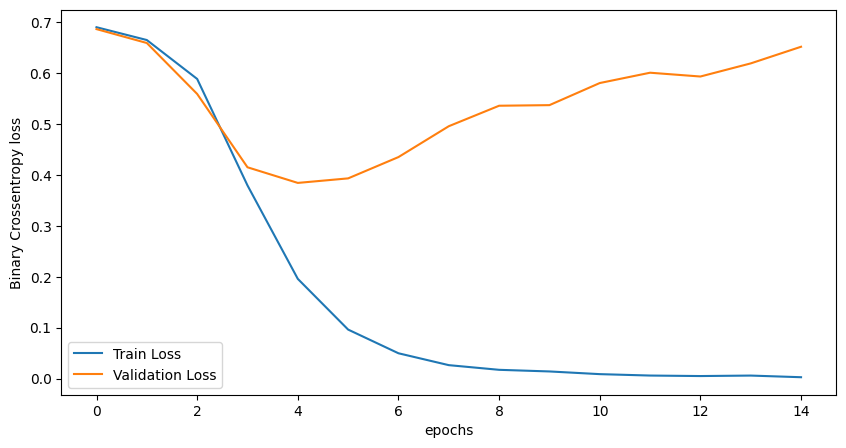

In [58]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('epochs')
plt.ylabel('Binary Crossentropy loss')
plt.legend()
plt.show()

### Evaluate the model


In [60]:
model.evaluate(x_train, y_train)

25/25 [==============================] - 0s 4ms/step - loss: 0.1311 - accuracy: 0.9588


[0.1310979127883911, 0.9587500095367432]

In [61]:
model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.5794 - accuracy: 0.8050


[0.5794252753257751, 0.8050000071525574]

### Predict results for train and test


In [62]:
yprob_train = model.predict(x_train)
yprob_test = model.predict(x_test)

7/7 [==============================] - 0s 3ms/step


In [63]:
yprob_train[0:5]

array([[9.9996173e-01],
       [9.9997354e-01],
       [9.9990559e-01],
       [1.2846242e-05],
       [9.9973696e-01]], dtype=float32)

In [64]:
ypred_train = [1 if prob>=0.5 else 0 for prob in yprob_train]
ypred_test = [1 if prob>=0.5 else 0 for prob in yprob_test]

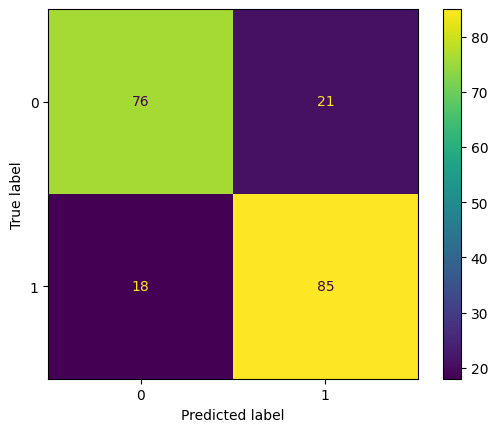

In [66]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, ypred_test)

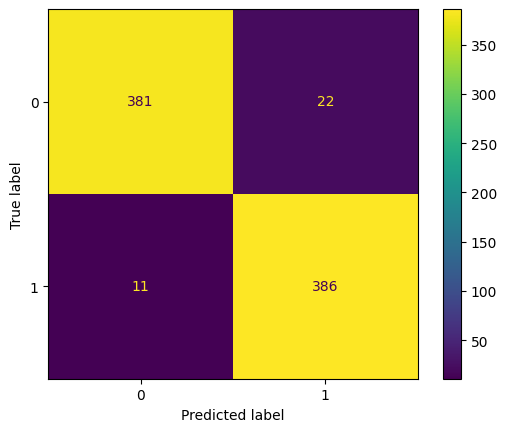

In [67]:
ConfusionMatrixDisplay.from_predictions(y_train, ypred_train)

In [69]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ypred_test))

              precision    recall  f1-score   support

           0       0.81      0.78      0.80        97
           1       0.80      0.83      0.81       103

    accuracy                           0.81       200
   macro avg       0.81      0.80      0.80       200
weighted avg       0.81      0.81      0.80       200



In [70]:
print(classification_report(y_train, ypred_train))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       403
           1       0.95      0.97      0.96       397

    accuracy                           0.96       800
   macro avg       0.96      0.96      0.96       800
weighted avg       0.96      0.96      0.96       800



### Save the model for future use


In [71]:
model.save("SentimentModel.keras")

### Load the model


In [72]:
from keras.models import load_model

In [73]:
nn = load_model("/content/SentimentModel.keras")
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               516352    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 549377 (2.10 MB)
Trainable params: 549377 (2.10 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Out of sample prediction


In [74]:
s = "Very tasty food"
t = tfidf.transform([s]).toarray()
t

array([[0., 0., 0., ..., 0., 0., 0.]])

In [75]:
model.predict(t)

1/1 [==============================] - 0s 31ms/step


array([[0.99422765]], dtype=float32)

In [76]:
def predict_sentiment():
  text = input("Please enter restuaraunt review : ")
  text = preprocess_text(text)
  text_pre = tfidf.transform([text]).toarray()
  prob = model.predict(text_pre)
  if prob>=0.5:
    print("Positive Review")
  else:
    print("Negative Review")
  return prob

In [77]:
predict_sentiment()


Please enter restuaraunt review : i like the food
1/1 [==============================] - 0s 16ms/step
Positive Review


array([[0.9819358]], dtype=float32)